In [222]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import sparse,  io, linalg
import pickle
from tqdm import tqdm_notebook as tqdm
import networkx as nx
import snap
from utils import *
import utils
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
college_messages = np.loadtxt('../CollegeMsg.txt',dtype=int)
# converting edge weight information into graph
G = nx.Graph()
for i in tqdm(range(college_messages.shape[0])):
    if G.has_edge(college_messages[i,0],college_messages[i,1]):
        G[college_messages[i,0]][college_messages[i,1]]['weight']+=1
    else:
        G.add_edge(college_messages[i,0],college_messages[i,1],weight=1)
for e in tqdm(G.edges()):
    G[e[0]][e[1]]['weight_inv']=1/float(G[e[0]][e[1]]['weight'])
    G[e[0]][e[1]]['weight_inv_exp']=np.exp(-float(G[e[0]][e[1]]['weight'])/3.0)

        

<IPython.core.display.Javascript object>


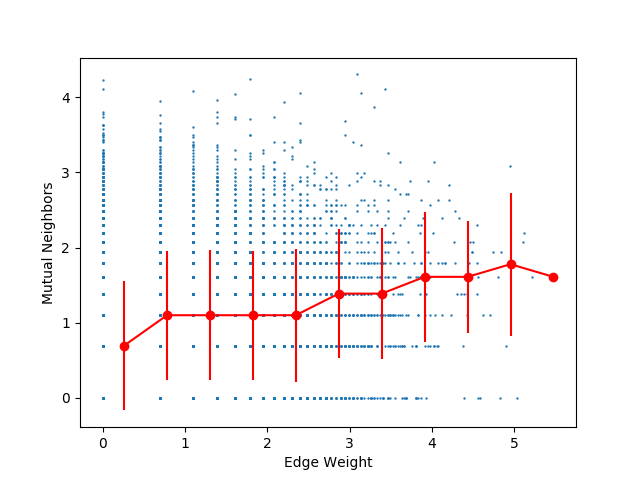

In [211]:
pwl=mutual(G)
plot_log_log_summary(pwl,"Edge Weight", "Mutual Neighbors", B=10,summary=np.median)

<IPython.core.display.Javascript object>


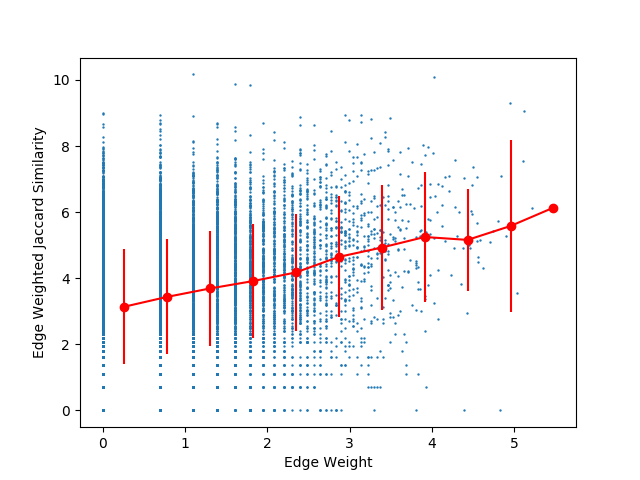

In [212]:
#pwl=sim_score_1(G)
pwl=mutual_ew(G)
plot_log_log_summary(pwl,"Edge Weight", "Edge Weighted Jaccard Similarity", B=10,summary=np.median)

<IPython.core.display.Javascript object>


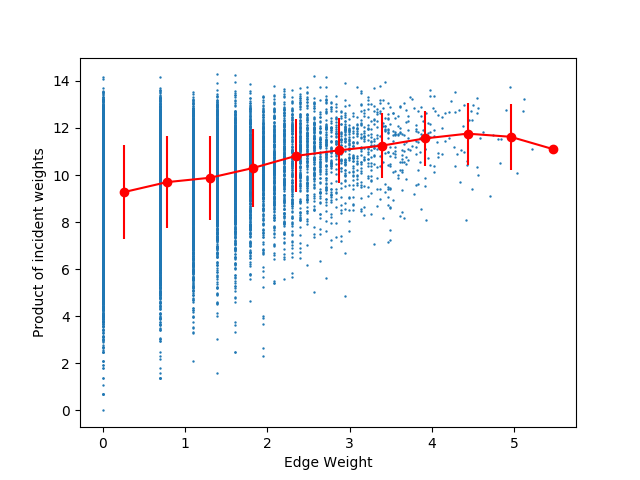

In [205]:
#pwl=sim_score_1(oregon_G)
pwl=ewpl(G)
plot_log_log_summary(pwl,"Edge Weight", "Product of incident weights", summary=np.median,B=10)

<IPython.core.display.Javascript object>


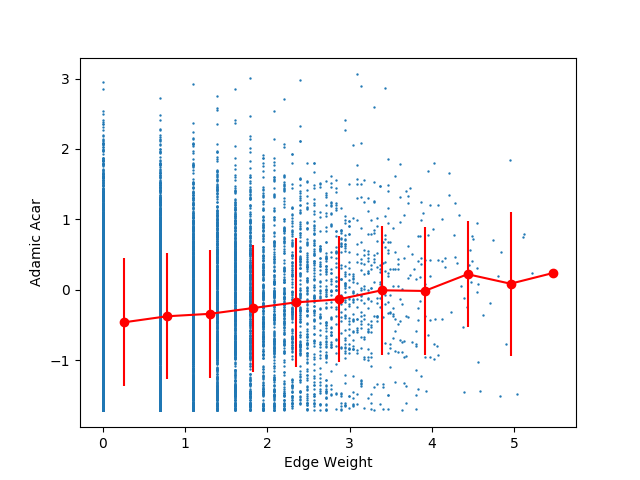

In [219]:
pwl=adamic_acar(G)
plot_log_log_summary(pwl,"Edge Weight", "Adamic Acar", B=10,summary=np.mean)

<IPython.core.display.Javascript object>


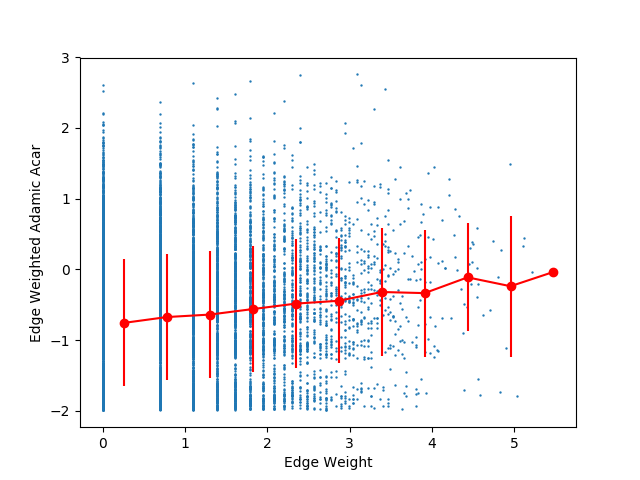

In [220]:
pwl=adamic_acar_ew(G)
plot_log_log_summary(pwl,"Edge Weight", "Edge Weighted Adamic Acar", B=10,summary=np.mean)

<IPython.core.display.Javascript object>


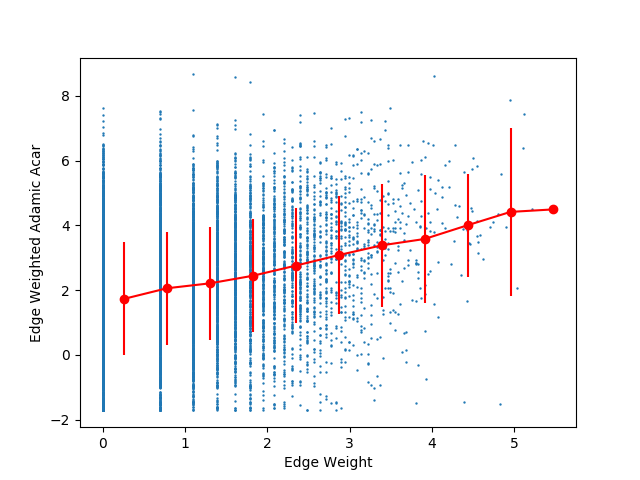

In [223]:
pwl=adamic_acar_ew_2(G)
plot_log_log_summary(pwl,"Edge Weight", "Edge Weighted Adamic Acar", B=10,summary=np.mean)

In [160]:
distances=[0.04,0.08,0.16,0.32,0.64,1.0,2.0]
pwl = self_similarity(G,distances,size=100)

<IPython.core.display.Javascript object>


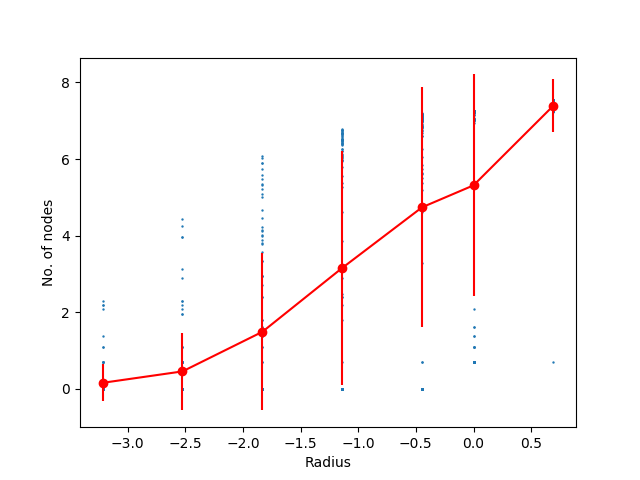

In [161]:
plot_log_log_summary(np.asarray(pwl),"Radius", "No. of nodes",discrete=True,summary=np.mean)

In [170]:
distances=[0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.0,2.0]
pwl = self_similarity(G,distances,size=1000,weight='weight_inv_exp')

<IPython.core.display.Javascript object>


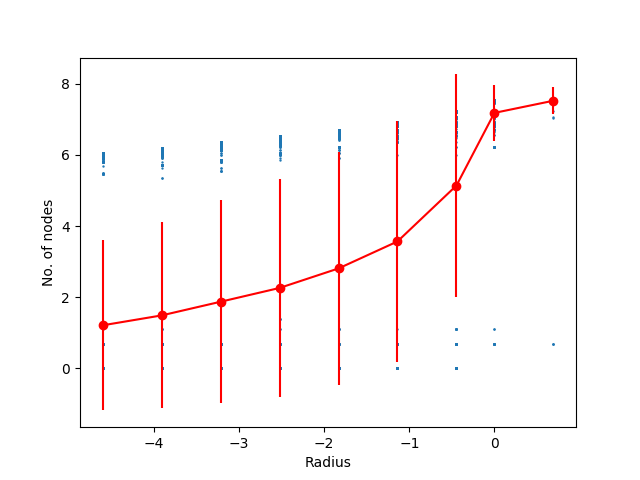

In [171]:
plot_log_log_summary(np.asarray(pwl),"Radius", "No. of nodes",discrete=True,summary=np.mean)

/Users/vaishnan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in double_scalars


<IPython.core.display.Javascript object>


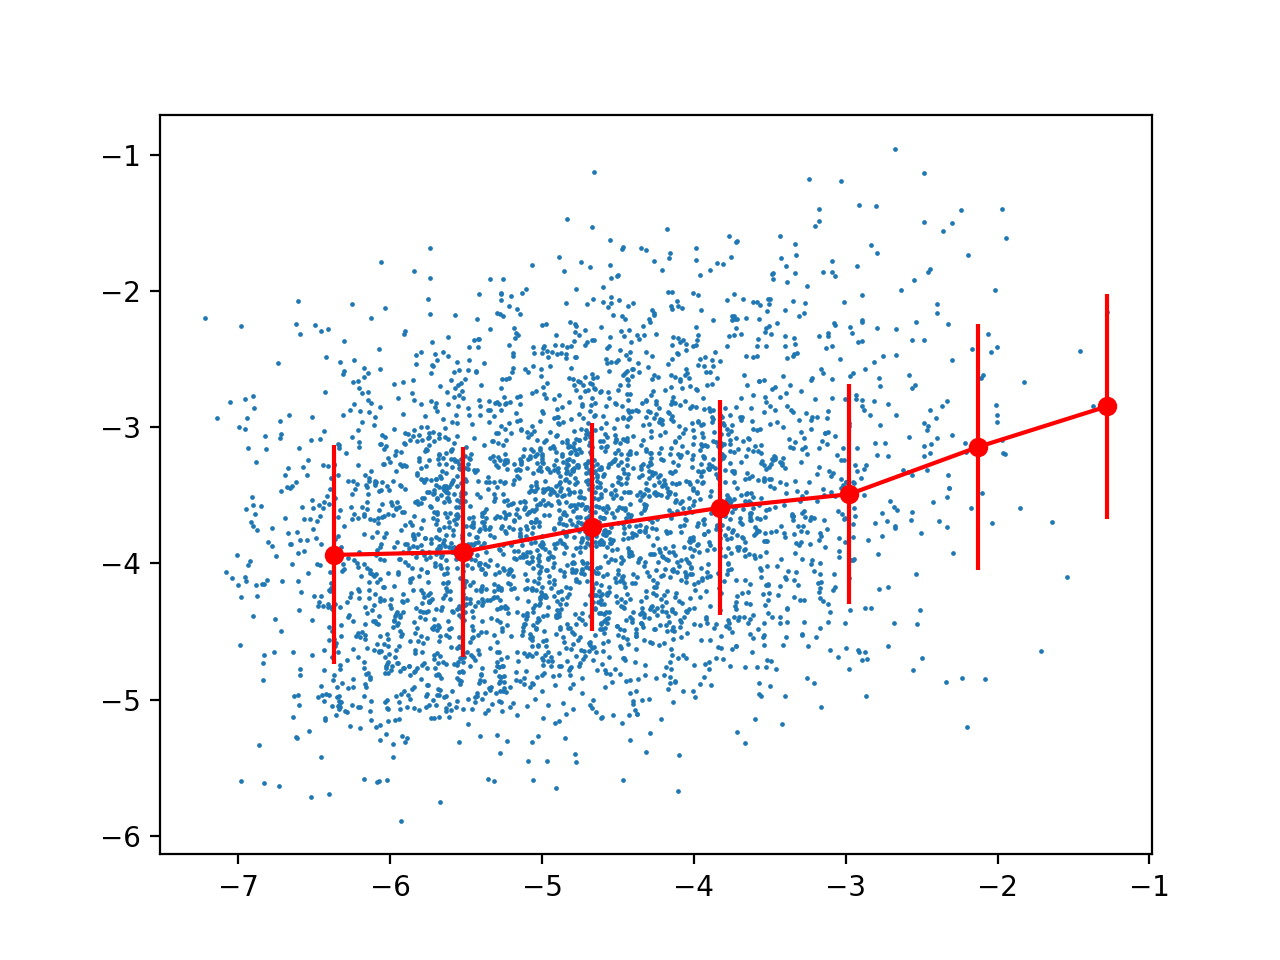

{2: {'weight': 0.81873075307798182},
 3: {'weight': 1.515144112143249e-06},
 30: {'weight': 0.36787944117144233},
 32: {'weight': 0.67032004603563933},
 36: {'weight': 0.027323722447292559},
 42: {'weight': 0.20189651799465538},
 44: {'weight': 0.16529888822158653},
 101: {'weight': 0.81873075307798182},
 123: {'weight': 0.67032004603563933},
 132: {'weight': 0.30119421191220214},
 135: {'weight': 0.5488116360940265},
 146: {'weight': 0.1353352832366127},
 159: {'weight': 0.67032004603563933},
 161: {'weight': 0.1353352832366127},
 194: {'weight': 0.81873075307798182},
 211: {'weight': 0.20189651799465538},
 255: {'weight': 0.44932896411722156},
 281: {'weight': 0.67032004603563933},
 302: {'weight': 0.5488116360940265},
 312: {'weight': 1.8601939266915511e-08},
 313: {'weight': 0.81873075307798182},
 323: {'weight': 0.81873075307798182},
 397: {'weight': 0.81873075307798182},
 477: {'weight': 0.018315638888734179},
 652: {'weight': 0.5488116360940265},
 856: {'weight': 0.6703200460356

In [123]:
#

(1, 2, {'weight_inv': 1.0, 'weight_inv_exp': 0.71653131057378927, 'weight': 1})
(1, 3, {'weight_inv': 0.014925373134328358, 'weight_inv_exp': 1.9987412283871416e-10, 'weight': 67})
(1, 132, {'weight_inv': 0.16666666666666666, 'weight_inv_exp': 0.1353352832366127, 'weight': 6})
(1, 135, {'weight_inv': 0.3333333333333333, 'weight_inv_exp': 0.36787944117144233, 'weight': 3})
(1, 1675, {'weight_inv': 0.14285714285714285, 'weight_inv_exp': 0.096971967864405054, 'weight': 7})
(1, 652, {'weight_inv': 0.3333333333333333, 'weight_inv_exp': 0.36787944117144233, 'weight': 3})
(1, 397, {'weight_inv': 1.0, 'weight_inv_exp': 0.71653131057378927, 'weight': 1})
(1, 146, {'weight_inv': 0.1, 'weight_inv_exp': 0.035673993347252395, 'weight': 10})
(1, 281, {'weight_inv': 0.5, 'weight_inv_exp': 0.51341711903259202, 'weight': 2})
(1, 30, {'weight_inv': 0.2, 'weight_inv_exp': 0.18887560283756183, 'weight': 5})
(1, 159, {'weight_inv': 0.5, 'weight_inv_exp': 0.51341711903259202, 'weight': 2})
(1, 1440, {'weigh

<IPython.core.display.Javascript object>


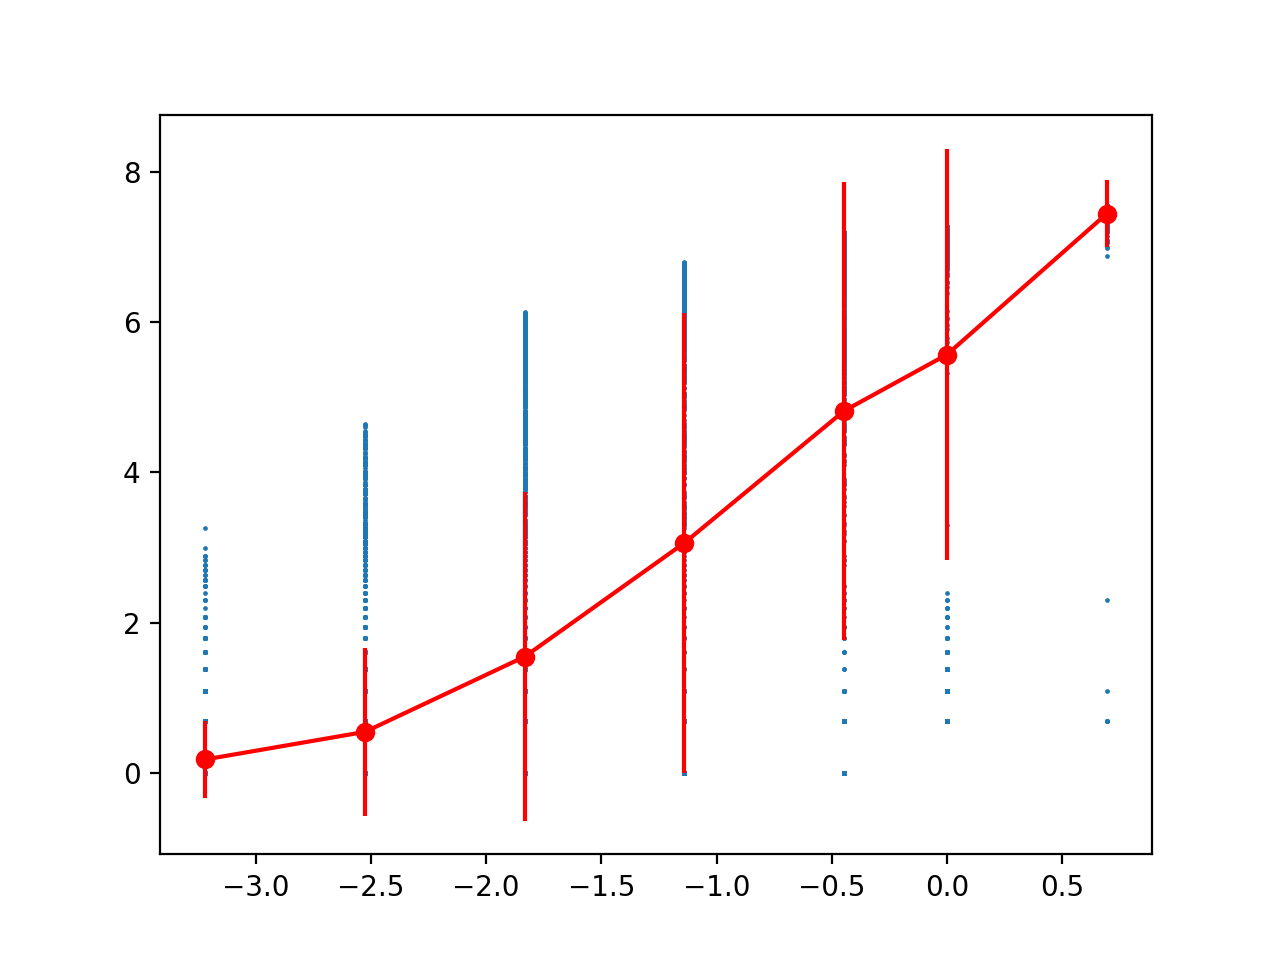

In [138]:
plot_log_log_summary(np.asarray(pwl),discrete=True,summary=np.mean)